In [6]:
import pathlib
from pprint import pprint
from lips import get_root_path

In [15]:
LIPS_PATH = get_root_path(pathlib_format="pathlib").parent
CONFIG_PATH = LIPS_PATH / "configurations" / "powergrid" / "benchmarks" / "l2rpn_idf_2023.ini"
DATA_PATH = LIPS_PATH / "reference_data" / "powergrid" / "l2rpn_idf_2023"
LOG_PATH = LIPS_PATH / "lips_logs_idf.log"

In [20]:
if not DATA_PATH.exists():
    DATA_PATH.mkdir(mode=511, parents=False)

In [23]:
from lips.benchmark.powergridBenchmark import PowerGridBenchmark
benchmark = PowerGridBenchmark(benchmark_path=DATA_PATH,
                               benchmark_name="Benchmark_competition",
                               load_data_set=False,
                               config_path=CONFIG_PATH,
                               log_path=LOG_PATH)

In [24]:
benchmark.generate(nb_sample_train=int(1e2),
                   nb_sample_val=int(1e2),
                   nb_sample_test=int(1e2),
                   nb_sample_test_ood_topo=int(1e2),
                   do_store_physics=True,
                   store_as_sparse=True
                  )

100%|██████████| 100/100 [00:03<00:00, 27.76it/s]


### create environment

In [ ]:
import grid2op
from lightsim2grid import LightSimBackend
env = grid2op.make("l2rpn_idf_2023", backend=LightSimBackend())
obs = env.reset()
grid = env.backend._grid

In [143]:
def create_fake_obs_custom(obs, data, idx = 0):
    obs.line_status = data["line_status"][idx]
    obs.topo_vect = data["topo_vect"][idx]
    obs.gen_p = data["prod_p"][idx]
    obs.gen_v = data["prod_v"][idx]
    obs.load_p = data["load_p"][idx]
    obs.load_q = data["load_q"][idx]
    obs.a_or = data["a_or"][idx]
    obs.a_ex = data["a_ex"][idx]
    obs.p_or = data["p_or"][idx]
    obs.p_ex = data["p_ex"][idx]
    obs.v_or = data["v_or"][idx]
    obs.v_ex = data["v_ex"][idx]
    obs.theta_or = data["theta_or"][idx]
    obs.theta_ex = data["theta_ex"][idx]
    return obs

In [133]:
obs = create_fake_obs_custom(obs, 
                             benchmark.train_dataset.data,
                             #idx=30)
                             idx=0)

In [147]:
my_list = []
for idx in range(30):
    obs = create_fake_obs_custom(obs,
                                 benchmark.train_dataset.data,
                                 idx=idx)
    my_list.append([idx, benchmark.train_dataset.data["slack"][idx][0], obs.gen_p[37], obs.theta_or[9]])

In [150]:
from pprint import pprint 
pprint(my_list)

[[0, 68.0, 38.073883, 0.0],
 [1, 68.0, 45.21826, 0.0],
 [2, 118.0, 34.968533, 6.975716],
 [3, 68.0, 43.79567, 0.0],
 [4, 68.0, 35.68722, 0.0],
 [5, 118.0, 33.623104, 7.54948],
 [6, 68.0, 43.110165, 0.0],
 [7, 68.0, 37.36961, 0.0],
 [8, 68.0, 35.669, 0.0],
 [9, 118.0, 33.983273, 7.163088],
 [10, 68.0, 36.641396, 0.0],
 [11, 68.0, 40.106205, 0.0],
 [12, 68.0, 40.557804, 0.0],
 [13, 118.0, 32.894936, 6.8917165],
 [14, 118.0, 118.12908, 1.4135908],
 [15, 68.0, 29.250776, 0.0],
 [16, 68.0, 38.987247, 0.0],
 [17, 68.0, 32.558372, 0.0],
 [18, 68.0, 31.232182, 0.0],
 [19, 68.0, 38.52959, 0.0],
 [20, 68.0, 39.491096, 0.0],
 [21, 68.0, 35.39444, 0.0],
 [22, 118.0, 34.081753, 5.8265715],
 [23, 68.0, 39.570774, 0.0],
 [24, 68.0, 30.48972, 0.0],
 [25, 68.0, 28.146812, 0.0],
 [26, 68.0, 32.107574, 0.0],
 [27, 119.0, 30.384176, 5.8877077],
 [28, 68.0, 31.679026, 0.0],
 [29, 119.0, 29.778362, 5.908229]]


In [141]:
my_list[0]

[0,
 68.0,
 array([ 63.6    ,  57.9    , 360.     ,  39.8    ,  56.1    ,  58.9    ,
         -0.     ,  51.4    ,  32.7    ,  51.4    ,   4.1    ,  39.2    ,
         33.2    , 360.     ,  38.1    ,  36.3    ,  29.5    ,  24.4    ,
         29.4    ,  84.4    ,  31.1    ,  19.5    ,  40.2    ,  48.1    ,
         19.6    ,  -0.     ,  27.2    ,  47.3    ,  48.6    ,  33.7    ,
         75.5    ,  59.1    ,  62.5    ,  23.8    ,  71.7    , 360.     ,
         23.4    ,  51.22556,  84.4    ,  35.9    ,  34.1    ,  -0.     ,
         82.7    ,  42.3    ,  41.7    ,  84.4    ,  20.7    ,  34.5    ,
         23.     ,  48.7    ,  48.6    ,   0.     ,  17.5    ,  83.6    ,
         10.5    , 134.6    ,  36.8    ,  20.4    , 134.6    ,  19.7    ,
         -0.     ,  25.6    ], dtype=float32)]

/tmp/ipykernel_21803/2494508050.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


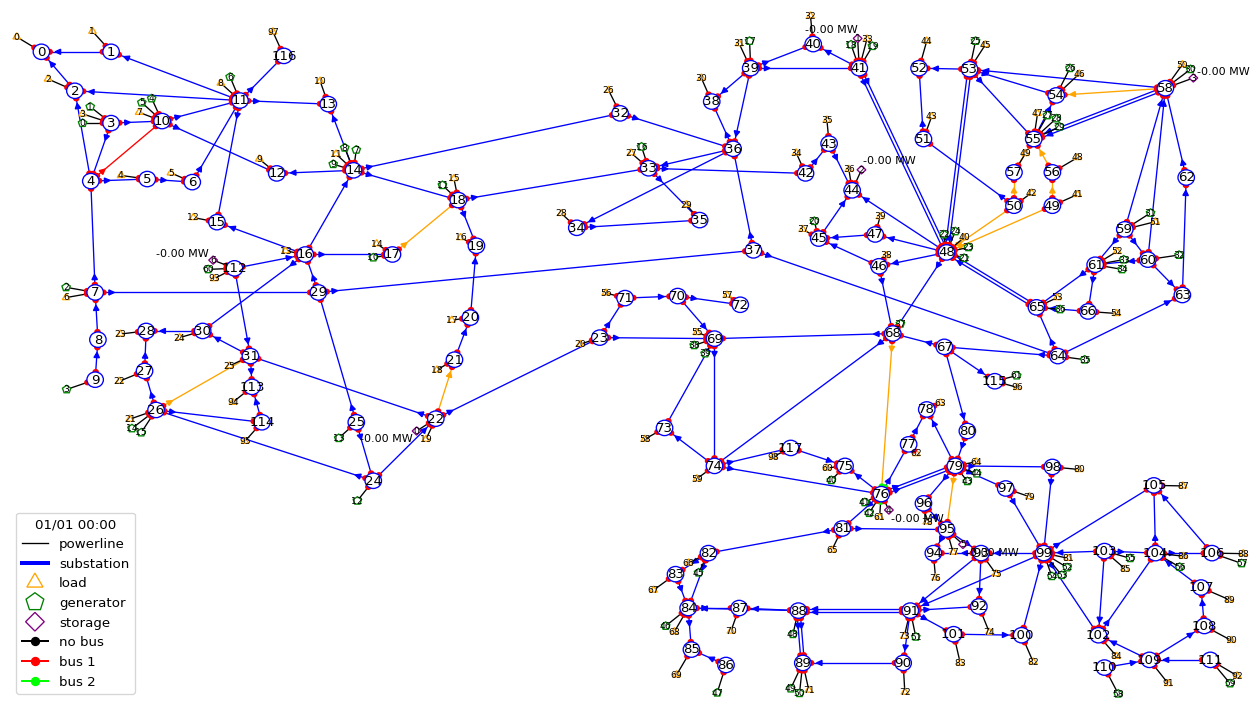

In [111]:
from grid2op.PlotGrid import PlotMatplot
plot_helper = PlotMatplot(env.observation_space)
fig = plot_helper.plot_obs(obs, line_info=None, load_info=None, gen_info=None)
fig.show()

In [115]:
obs.gen_bus[42]

1

In [117]:
obs.gen_p[37]

62.352695

In [72]:
grid.get_slack_ids()

array([68], dtype=int32)

In [134]:
nb_bus, unique_bus, bus_or, bus_ex = obs._aux_fun_get_bus()

In [135]:
unique_bus

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 194, 217], dtype=int32)

In [81]:
nb_bus

119

AttributeError: 'ObservationIDF2023_l2rpn_idf_2023' object has no attribute 'n_buses'

In [75]:
unique_bus

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 194], dtype=int32)

In [136]:
186 - 118

68

In [137]:
194 - 118

76

In [41]:
obs.get_obj_connect_to(substation_id=68)

{'loads_id': array([], dtype=int64),
 'generators_id': array([37]),
 'lines_or_id': array([  9,  12, 171]),
 'lines_ex_id': array([169, 170, 184]),
 'storages_id': array([], dtype=int64),
 'nb_elements': 7}

In [90]:
obs.get_obj_connect_to(substation_id=76)

{'loads_id': array([61]),
 'generators_id': array([41, 42]),
 'lines_or_id': array([15, 17, 18, 20]),
 'lines_ex_id': array([11, 12, 14]),
 'storages_id': array([4]),
 'nb_elements': 11}

In [64]:
obs.get_obj_connect_to(substation_id=93)

{'loads_id': array([75]),
 'generators_id': array([], dtype=int64),
 'lines_or_id': array([40, 43, 49]),
 'lines_ex_id': array([38, 39]),
 'storages_id': array([], dtype=int64),
 'nb_elements': 6}

In [78]:
obs.get_obj_connect_to(substation_id=97)

{'loads_id': array([79]),
 'generators_id': array([], dtype=int64),
 'lines_or_id': array([52]),
 'lines_ex_id': array([45]),
 'storages_id': array([], dtype=int64),
 'nb_elements': 3}

In [31]:
import numpy as np
np.unique(benchmark.train_dataset.data["slack"][:,0])

array([ 68., 118., 119.], dtype=float16)

In [69]:
benchmark.train_dataset.data["slack"][:30]

array([[ 68.    ,  -5.926 ],
       [ 68.    ,   1.719 ],
       [118.    , -43.    ],
       [ 68.    ,   0.9956],
       [ 68.    ,  -7.01  ],
       [118.    , -42.7   ],
       [ 68.    ,   0.5103],
       [ 68.    ,  -6.13  ],
       [ 68.    ,  -8.234 ],
       [118.    , -43.6   ],
       [ 68.    ,  -5.457 ],
       [ 68.    ,  -0.794 ],
       [ 68.    ,  -0.4421],
       [118.    , -39.5   ],
       [118.    , -39.2   ],
       [ 68.    ,  -9.55  ],
       [ 68.    ,  -0.3127],
       [ 68.    ,  -6.742 ],
       [ 68.    ,  -7.867 ],
       [ 68.    ,  -0.8706],
       [ 68.    ,   0.5913],
       [ 68.    ,  -3.906 ],
       [118.    , -39.6   ],
       [ 68.    ,   1.471 ],
       [ 68.    ,  -6.31  ],
       [ 68.    ,  -7.85  ],
       [ 68.    ,  -2.992 ],
       [119.    , -35.2   ],
       [ 68.    ,  -2.121 ],
       [119.    , -33.8   ]], dtype=float16)

In [118]:
benchmark.train_dataset.data["prod_p"][:,37]

array([ 38.073883,  45.21826 ,  34.968533,  43.79567 ,  35.68722 ,
        33.623104,  43.110165,  37.36961 ,  35.669   ,  33.983273,
        36.641396,  40.106205,  40.557804,  32.894936, 118.12908 ,
        29.250776,  38.987247,  32.558372,  31.232182,  38.52959 ,
        39.491096,  35.39444 ,  34.081753,  39.570774,  30.48972 ,
        28.146812,  32.107574,  30.384176,  31.679026,  29.778362,
        26.103619,  34.03944 ,  28.074286,  29.474194,  38.711628,
        35.529324,  30.96896 ,  51.22556 ,  33.265842,  39.155125,
        38.274357,  34.385044,  34.72386 ,  34.266193,  38.484837,
        40.62508 ,  45.760143,  47.404392,  50.31763 ,  55.254395,
        56.973866,  62.974804,  63.56034 ,  70.87138 ,  74.98175 ,
        76.168175,  88.06373 ,  85.90395 ,  90.23901 ,  91.62917 ,
        99.792595, 100.35131 , 104.87143 , 108.49679 , 114.573715,
       116.76783 , 123.63139 , 125.332985, 130.8865  , 137.56241 ,
       138.12715 , 142.83151 , 144.72508 , 148.74026 , 168.195

In [102]:
obs.gen_p[37]

62.352695

In [119]:
benchmark.train_dataset.data["theta_or"][:,9]

array([ 0.        ,  0.        ,  6.975716  ,  0.        ,  0.        ,
        7.54948   ,  0.        ,  0.        ,  0.        ,  7.163088  ,
        0.        ,  0.        ,  0.        ,  6.8917165 ,  1.4135908 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  5.8265715 ,  0.        ,  0.        ,
        0.        ,  0.        ,  5.8877077 ,  0.        ,  5.908229  ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  6.2047462 ,  0.        ,  0.        ,  6.039125  ,
        6.024623  ,  5.9960985 ,  0.        ,  0.        ,  0.        ,
        5.796634  ,  5.4626904 ,  0.        ,  4.418998  ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.6981431 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.40355495, -0.15059698,  0.        , -0.16848217,  0.  

In [65]:
benchmark.train_dataset.data["theta_or"][:,40]

array([-27.247108 , -25.944756 , -19.402435 , -23.249786 , -23.407797 ,
       -18.79304  , -25.621025 , -23.077812 , -23.046288 , -18.378422 ,
       -22.338398 , -22.136143 , -22.009111 , -19.819729 , -24.30997  ,
       -22.433704 , -23.585024 , -20.974041 , -22.016409 , -23.209795 ,
       -20.880468 , -21.130566 , -19.240017 , -20.208298 , -20.257769 ,
       -19.101742 , -18.730566 , -14.60348  , -17.179447 , -13.385134 ,
       -17.246456 , -20.077843 , -17.218927 , -18.188429 , -18.808182 ,
       -22.995884 , -16.02104  , -20.531736 , -21.022497 , -20.016218 ,
       -19.894243 , -17.716518 , -21.600859 , -21.544348 , -22.223494 ,
       -17.729198 , -17.462746 , -21.687082 , -18.090082 , -20.40393  ,
       -20.072502 , -20.958967 , -19.43649  , -18.826693 , -18.762323 ,
       -18.327677 , -18.07539  , -18.734028 , -17.79491  , -16.88363  ,
       -18.237837 , -18.4818   , -18.40168  , -19.20811  , -18.658453 ,
       -18.462364 , -18.780926 , -19.02947  , -18.975683 , -18.8

In [79]:
benchmark.train_dataset.data["theta_or"][:,52]

array([-14.455285 , -13.48477  , -10.439721 , -14.439403 , -14.64106  ,
        -9.867496 , -13.209313 , -14.33226  , -14.4009285,  -9.67839  ,
       -13.870835 , -13.741543 , -13.656387 ,  -7.9843645, -16.339205 ,
       -14.166093 , -12.206827 , -13.438836 , -13.916955 , -11.913327 ,
       -13.035204 , -13.270156 ,  -7.5778203, -12.55119  , -12.645206 ,
       -11.739569 , -11.565657 ,  -7.4179254, -10.37849  ,  -6.4308543,
       -10.587603 ,  -7.978953 , -10.504102 , -11.173745 , -11.675613 ,
        -9.957244 ,  -8.364093 , -12.797994 , -13.127954 ,  -8.081272 ,
        -8.298142 ,  -9.725794 , -13.71525  , -13.718288 , -14.343398 ,
        -9.947523 ,  -9.918801 , -14.104003 , -10.585061 , -13.145073 ,
       -12.943528 , -12.040918 , -12.530229 , -12.081015 , -12.098101 ,
       -11.83141  , -11.664592 , -10.8976345, -11.516035 , -10.593833 ,
       -11.999928 , -11.90717  , -12.236213 , -12.9313135, -12.488008 ,
       -12.331732 , -12.680343 , -12.989188 , -12.996081 , -12.9

In [94]:
benchmark.train_dataset.data["theta_or"][:,52]

array([-10.766006 ,  -9.014997 ,  -5.1587963,  -8.605262 ,  -8.727303 ,
        -4.6527476,  -8.874739 ,  -8.506414 ,  -8.597476 ,  -4.529819 ,
        -8.237852 ,  -8.177817 ,  -8.113529 ,  -4.458927 ,  -9.912829 ,
        -9.287609 ,  -8.144193 ,  -7.9647546,  -9.1160965,  -7.9827485,
        -7.7781286,  -8.100777 ,  -4.513095 ,  -7.570945 ,  -8.382619 ,
        -7.1406436,  -7.905838 ,  -3.784086 ,  -6.7096004,  -3.3583994,
        -7.90614  ,  -7.2124867,  -7.08098  ,  -8.379944 ,  -7.6865892,
        -7.793356 ,  -4.127491 ,  -7.7813573,  -7.8928623,  -4.815953 ,
        -4.8533144,  -4.7273912,  -8.151589 ,  -8.152156 ,  -9.512533 ,
        -4.906233 ,  -5.0651674,  -9.43522  ,  -5.8582354,  -7.8537855,
        -7.722747 ,  -7.689699 ,  -7.478205 ,  -7.1808653,  -7.2200074,
        -7.053482 ,  -7.011827 ,  -6.8136683,  -6.759855 ,  -5.828089 ,
        -7.178574 ,  -7.084615 ,  -7.235601 ,  -8.336292 ,  -7.4503126,
        -7.2897477,  -7.6238585,  -7.9691916,  -7.971884 ,  -8.0